In [10]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy import constants

#Graphing variables
pagewidth = (8.5, 5)

In [54]:
#Function definitions

''' Plots the distributions of data as a histogram against the gaussian distribution with mean and stddev matching
    that of the data. 
'''
def plot_distribution(data, filename, title, figsize=pagewidth, bins='sturges', hrange=(-100, 100), 
                      directory='graphs/distributions/', logmode=False):
    plt.figure(figsize=figsize)
    if (hrange == (-100, 100)): hrange = (min(data), max(data))
    gspace = np.linspace(hrange[0], hrange[1], 1000)
    gnorm = norm.pdf(gspace, loc=np.mean(data), scale=np.std(data))
    if type(bins) is str: bins = len(np.histogram_bin_edges(data, bins=bins)) - 1
    gnorm *= 1000 * len(data) / (sum(gnorm) * bins)
    plt.plot(gspace, gnorm, color='orange', label='normal distribution')
    plt.hist(data, bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Frequency')
    if logmode: plt.yscale('log')
    plt.title('Distribution of Data, with frequency '+title+', # bins='+str(bins))
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

''' Sums n adjacent samples together in list data and returns a new list of size len(data)/n. 
    n should be a factor of len(data).
'''
def sum_adjacent(data, n):
    return np.sum(data.reshape(int(len(data)/n), -1), axis=1)

''' Plots the distributions of power data as a histogram against the chi squared distribution 
    with mean and stddev matching that of the data. 
'''
def plot_chi2(data, n, filename, title, figsize=pagewidth, bins=70, hrange=(-100, 100), 
              directory='graphs/chi2/'):
    plt.figure(figsize=figsize)
    cspace = np.linspace(hrange[0], hrange[1], 1000)
    cnorm = chi2.pdf(cspace, n, loc=np.mean(data), scale=np.std(data))
    cnorm *= 1000 * len(data) / (sum(cnorm) * bins * n)
    plt.plot(cspace, cnorm, color='orange', label='chi2 distribution, df='+str(n))
    plt.hist(sum_adjacent(data, n), bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Power Estimates, with frequency '+title)
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

In [4]:
%%time
#CPU times: user 380 ms, sys: 442 ms, total: 822 ms Wall time: 11.4 s

#Load data, subtract mean
#Ended up being much faster this way then using an array

room_fm = np.fromfile('newdata/room_FM_100m.dat', dtype='int16')-2.**11 
room_fm -= np.mean(room_fm)

CPU times: user 380 ms, sys: 442 ms, total: 822 ms
Wall time: 11.4 s


In [3]:
#Title strings for graphing
filenames = ['room_UHF_100m', 'room_FM_100m', 'room_LTE_100m', 
             'boiling', #'boiling2', 'boiling3', 'boiling4',
             'ice', 'dry_ice', 'liquid_nitrogen']
titles = ['1GHz @21.9$^\circ$ C', '100MHz @21.9$^\circ$ C', '720MHz @21.9$^\circ$ C', 
          '1GHz @87.2$^\circ$ C', #'1GHz @77.1$^\circ$ C', '1GHz @61.8$^\circ$ C', '1GHz @56.6$^\circ$ C', 
          '1GHz @0.8$^\circ$ C', '1GHz @-78.5$^\circ$ C', '1GHz @-195.8$^\circ$ C']

CPU times: user 19.6 s, sys: 615 ms, total: 20.2 s
Wall time: 19.8 s


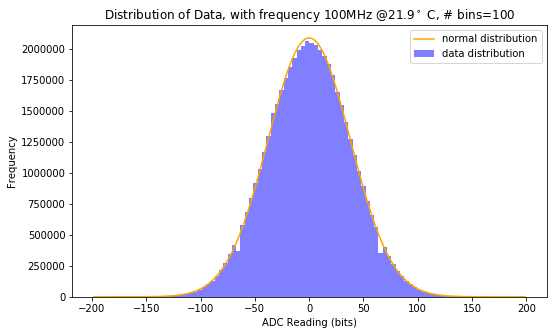

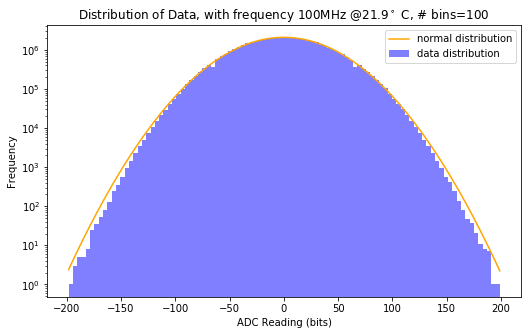

In [7]:
%%time
#CPU times: user 19.6 s, sys: 615 ms, total: 20.2 s Wall time: 19.8 s

#Distribution graphs
plot_distribution(room_fm[50000000:], filenames[1], titles[1], bins=100)
plot_distribution(room_fm[50000000:], filenames[1]+'log-y', titles[1], logmode=True, bins=100)

In [50]:
%%time
#CPU times: user 286 ms, sys: 240 ms, total: 525 ms Wall time: 525 ms

#Calculate power lists
constant = constants.epsilon_0 * constants.c / 2
power_fm = constant * room_fm**2

CPU times: user 357 ms, sys: 415 ms, total: 771 ms
Wall time: 1.25 s


No handles with labels found to put in legend.


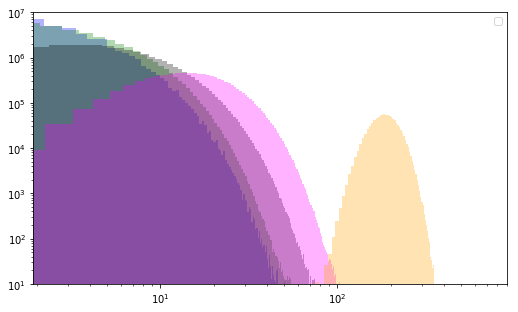

CPU times: user 8.05 s, sys: 731 ms, total: 8.78 s
Wall time: 8.65 s


In [69]:
%%time
#CPU times: user 8.45 s, sys: 1.7 s, total: 10.1 s Wall time: 10.7 s

num = np.array([1, 2, 4, 10, 100])
colours = ['blue', 'green', 'black', 'magenta', 'orange']
plt.figure(figsize=pagewidth)
plist, cspace, clist = [], [], []
for i in range(len(num)): 
    plist.append(sum_adjacent(power_fm, num[i]))
    cspace.append(np.linspace(min(plist[i], max(plist[i]), 600)))
plist = np.array(plist_fm)
for i in range(len(plist_fm)): plt.hist(plist_fm[i], bins=200, color=colours[i], alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlim((mean_fm, max(plist_fm[-1])))
plt.ylim((10, 10**7))
plt.legend()
plt.show()

CPU times: user 17.8 s, sys: 519 ms, total: 18.3 s
Wall time: 18.1 s


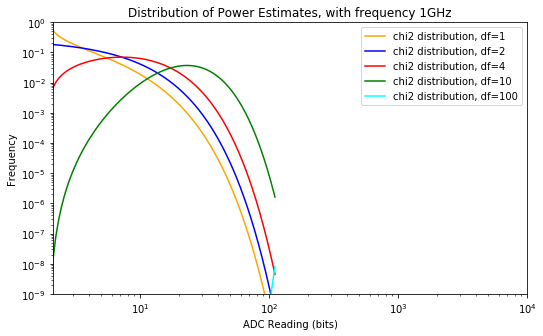

In [14]:
%%time
#CPU times: user 17.8 s, sys: 519 ms, total: 18.3 s Wall time: 18.1 s

plt.figure(figsize=pagewidth)
mean_fm, std_fm = np.mean(power_fm), np.std(power_fm)
cspace = np.linspace(min(power_fm), max(power_fm), 1000)
cnorm = chi2.pdf(cspace, 1, loc=mean_fm, scale=std_fm)
cnorm2 = chi2.pdf(cspace, 2, loc=mean_fm, scale=std_fm)
cnorm4 = chi2.pdf(cspace, 4, loc=mean_fm, scale=std_fm)
cnorm10 = chi2.pdf(cspace, 10, loc=mean_fm, scale=std_fm)
cnorm100 = chi2.pdf(cspace, 100, loc=mean_fm, scale=std_fm)
#cnorm *= 1000 * len(data) / (sum(cnorm) * bins * n)
plt.plot(cspace, cnorm, color='orange', label='chi2 distribution, df=1')
plt.plot(cspace, cnorm2, color='blue', label='chi2 distribution, df=2')
plt.plot(cspace, cnorm4, color='red', label='chi2 distribution, df=4')
plt.plot(cspace, cnorm10, color='green', label='chi2 distribution, df=10')
plt.plot(cspace, cnorm100, color='cyan', label='chi2 distribution, df=100')
#plt.hist(sum_adjacent(data, n), bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
plt.xlabel('ADC Reading (bits)')
plt.ylabel('Frequency')
plt.xlim((1.1*mean_fm, 10**4))
plt.ylim((10**(-9), 10**0))
plt.xscale('log')
plt.yscale('log')
plt.title('Distribution of Power Estimates, with frequency 1GHz')
plt.legend()
plt.savefig('graphs/chi2/test.png', bbox_inches='tight')